# CPSC 322
## Final Project


### Introduction

The dataset that was used was the Historical Averages of Individual NFL teams from 2018 to present. In order to perform classification, the NFL teams were matched together, where all the attributes were compared to eachother. If the home team for a particular matchup had a greater value for this attribute, then it would be marked with the label 'H', whereas the away team would be marked with the label 'A'. The values used for each attribute is the average per game for each previous game played in that season. This way none of the data from previous seasons is taken into account when predicting a game winner, as each team is very different each season. This processing allowed for the classification to predict that either the Home Team (H) or Away team (A) wins the game is predicted. The intial findings is that the decision tree and random forest classifiers were the best classifiers for the data set, which performed very similarly.

In [22]:
# some useful mysklearn package import statements and reloads
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import API_Stuff.NFLdata_webapp
importlib.reload(API_Stuff.NFLdata_webapp)
import API_Stuff.NFLdata_webapp as NFLdata_webapp

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation


### Data Analysis

Our full dataset has 14 attributes. They are, "Season, Week, HomeTeam, AwayTeam, WinPercentage, RushYards, PassYards, Scoring, RushYardsAllowed, PassYardsAllowed, DefenseScoringAllowed, KickingPercentage, TurnoverMargin, Winner". The first four attributes (Season, Week, HomeTeam, and AwayTeam) were used during the data preprocessing stages to create the rest of the dataset, which is populated with the labels 'H' and 'A'. The classifiers look at 9 attributes (WinPercentage, RushYards, PassYards, Scoring, RushYardsAllowed, PassYardsAllowed, DefenseScoringAllowed, KickingPercentage, TurnoverMargin) to predict the target y_value (Winner).

This dataset has a total of 1762 instances.  
In this dataset, the home team won 949 times, and the away team won 813 times.  
This shows a clear home team advantage.


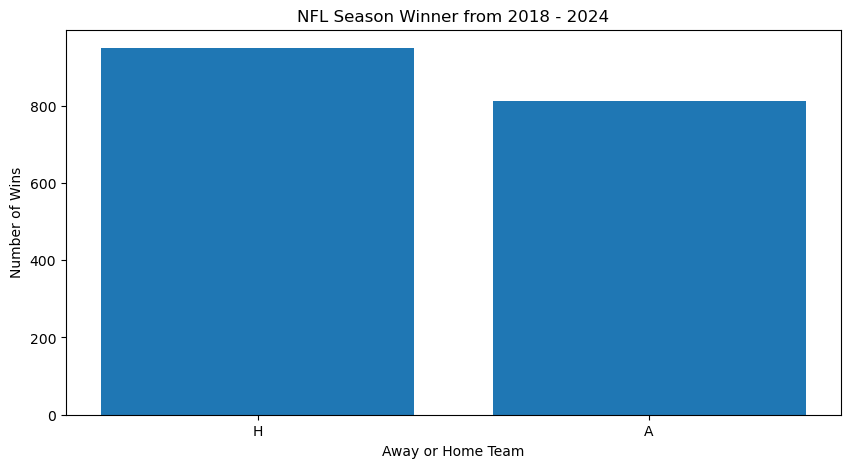

In [23]:
myutils.plotClassification()

NFL Winner from 2018 to 2024 winner shows the spread of classification across the dataset. This shows that there is not an equal distribution, which is a potential problem in the analysis and accurate classification. This also highlights that there is a potential home team advantage.

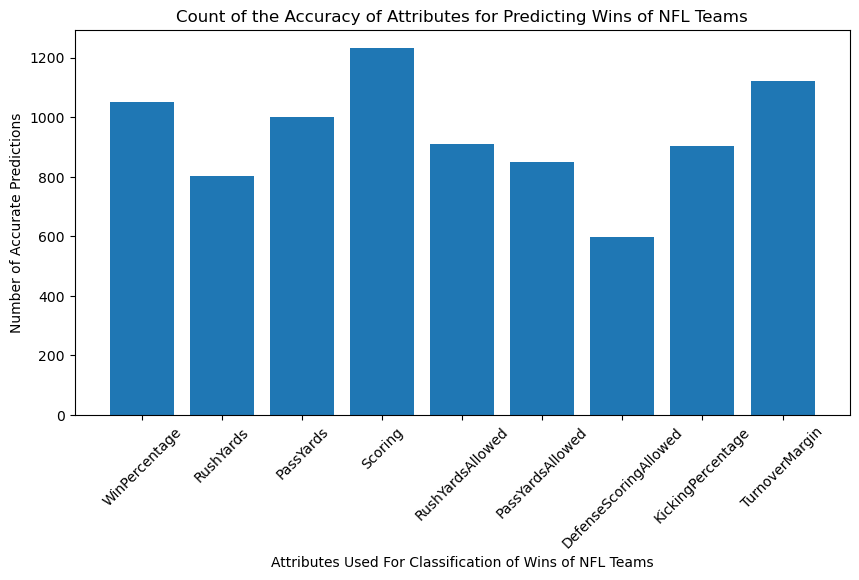

In [24]:
myutils.plotComparison()


This looks at the accuracy of each individual attribute used in the classification and prediction of the Home team or Away Team winning. It looks at if they predict H or A, how many times is the winner actually that instance. This shows which attributes might be the most effective in prediction.  
In our dataset, Scoring (average amount of points scored per game played that season) is most useful for predicting game winner.

## Classifier Tests, Evaluation, Results

For our project we decided to implement Naive Bayes, Knn, Decision Tree, and Random Forest.  
We tested each classifier with K-Fold cross validation, then printed out the accuracy, error rate, precision, recall, F1 measure, and confusion matrix for each classifier. This allows us to directly compare the classifier's performances. 

Knn routinely has the highest precision, but the lowest accuracy. This is because it predicts Home team almost every time. "Home" is given as the positive label, so this results in a high frequency of true positives. With this in mind, Knn was not an effective classifier for our dataset.

Naive Bayes performs much better than Knn, but still suffers from the same problem: it predicts Home team too frequently. This is to be expected given the distribution of the wins from the training set, which certainly favors the home team. 

Decision Tree and Random Forest are tied for the best performing classifiers for our dataset. The results of Random Forest fluctuate slightly but are always within 1% of Decision Tree. To show this, we have printed our results and confusion matrices down below.

#### Creating dataset and classifiers

In [25]:
# Creating data and classifiers 

my_dataset = MyPyTable().load_from_file("input_data/NFL_regseason_data_clean.csv")
X_data = []
for row in my_dataset.data: # Creating X_data
    new_row = []
    new_row.append(row[my_dataset.column_names.index('WinPercentage')])
    new_row.append(row[my_dataset.column_names.index('RushYards')])
    new_row.append(row[my_dataset.column_names.index('PassYards')])
    new_row.append(row[my_dataset.column_names.index('Scoring')])
    new_row.append(row[my_dataset.column_names.index('RushYardsAllowed')])
    new_row.append(row[my_dataset.column_names.index('PassYardsAllowed')])
    new_row.append(row[my_dataset.column_names.index('DefenseScoringAllowed')])
    new_row.append(row[my_dataset.column_names.index('KickingPercentage')])
    new_row.append(row[my_dataset.column_names.index('TurnoverMargin')])
    X_data.append(new_row)

y_data = my_dataset.get_column('Winner') #Creating y_data

NFL_Bayes_Classifier = MyNaiveBayesClassifier()
NFL_Knn_Classifier = MyKNeighborsClassifier()
NFL_Tree_Classifier = MyDecisionTreeClassifier()
NFL_Forest_Classifier = MyRandomForestClassifier()

#### Using K-fold Cross Validation on Classifiers

In [26]:
(total_knn_accuracy, total_bayes_accuracy, total_tree_accuracy, total_forest_accuracy, 
knn_precision, bayes_precision, tree_precision, forest_precision,
knn_recall, bayes_recall, tree_recall, forest_recall, 
knn_F1, bayes_F1, tree_F1, forest_F1, knn_predictions, bayes_predictions, tree_predictions, 
forest_predictions) = myutils.performCrossValidation(X_data, y_data, NFL_Bayes_Classifier, NFL_Knn_Classifier, NFL_Tree_Classifier, NFL_Forest_Classifier)


#### Showing Classifier Performance

In [27]:
myutils.print_performance_data("Knn", total_knn_accuracy, knn_precision, knn_recall, knn_F1, knn_predictions, y_data)
myutils.print_performance_data("Bayes", total_bayes_accuracy, bayes_precision, bayes_recall, bayes_F1, bayes_predictions, y_data)
myutils.print_performance_data("Decision Tree", total_tree_accuracy, tree_precision, tree_recall, tree_F1, tree_predictions, y_data)
myutils.print_performance_data("Random Forest", total_forest_accuracy, forest_precision, forest_recall, forest_F1, forest_predictions, y_data, True)

------- Knn Classifier -------
Accuracy:  0.54 | Error Rate:  0.46
Precision :  0.84 | Recall:  0.55 | F1 measure:  0.64
Knn Confusion Matrix: 
+-------+------+-----+-------+
|       | H    | A   | total |
+-------+------+-----+-------+
| H     | 806  | 143 | 949   |
+-------+------+-----+-------+
| A     | 664  | 149 | 813   |
+-------+------+-----+-------+
| total | 1470 | 292 | 1762  |
+-------+------+-----+-------+

------- Bayes Classifier -------
Accuracy:  0.6 | Error Rate:  0.4
Precision :  0.69 | Recall:  0.61 | F1 measure:  0.65
Bayes Confusion Matrix: 
+-------+------+-----+-------+
|       | H    | A   | total |
+-------+------+-----+-------+
| H     | 653  | 296 | 949   |
+-------+------+-----+-------+
| A     | 414  | 399 | 813   |
+-------+------+-----+-------+
| total | 1067 | 695 | 1762  |
+-------+------+-----+-------+

------- Decision Tree Classifier -------
Accuracy:  0.67 | Error Rate:  0.33
Precision :  0.67 | Recall:  0.7 | F1 measure:  0.68
Decision Tree Confus

### Decision Tree Ruleset

In [28]:
NFL_Tree_Classifier.fit(X_data, y_data)
#NFL_Tree_Classifier.print_decision_rules(class_name="Winner")
#print(NFL_Tree_Classifier.tree)

## Classification API

For our Classification Web App we decided to deploy the Decision Tree Classifier.

In [29]:
# Running API
NFLdata_webapp.run_api()

# url = "http://127.0.0.1:5001/predict?WinPercentage=H&RushYards=H&PassYards=H&Scoring=H&RushYardsAllowed=H&PassYardsAllowed=H&DefenseScoringAllowed=H&KickingPercentage=H&TurnoverMargin=H"

 * Serving Flask app 'API_Stuff.NFLdata_webapp'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5001
 * Running on http://172.17.0.2:5001
Press CTRL+C to quit
 * Restarting with watchdog (inotify)
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/conda/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.12/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/opt/conda/lib/python3.12/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, 

SystemExit: 1

/opt/conda/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
